<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/exploration/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [395]:
import sys
import subprocess
import pkg_resources

required = {"patchworklib","seaborn","numpy","matplotlib","scikit-learn","pandas"}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    sys.stderr.write(f"ERROR: Missing the following required packages:\n{missing}\n")
    sys.stderr.write("Attempting to install missing dependencies to user directory")
    sys.stderr.flush()
    python = sys.executable
    subprocess.check_call([python, "-m", "pip","install",*missing,"--user"], stdout=subprocess.DEVNULL)

In [396]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import uuid

from typing import Dict

import patchworklib as pw

sns.set_style()

import sklearn
from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [397]:

print(sklearn.__version__)

#data = load_wine(as_frame=True)

winebunch: sklearn.utils.Bunch = load_wine()

#print(winebunch)

#print(winebunch.data)
#print(winebunch.data.T[0])

xdata: Dict[str, np.ndarray] = dict(
    (winebunch.feature_names[i], winebunch.data.T[i])
    for i in range(len(winebunch.feature_names))
)

data: pd.DataFrame = pd.DataFrame.from_dict(xdata)

x_cols: np.ndarray = data.columns.values

data.head()


0.22.2.post1


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [398]:
def decode_wine_y(raw_y) -> str:
    return winebunch.target_names[raw_y]



In [399]:
df: pd.DataFrame = data.copy()  # features

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [400]:
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = pd.Series(winebunch.target.astype(np.uint8))
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [401]:
#How many samples and features are there?

# YOUR CODE HERE
print(f"Dataframe shape: {df.shape}\n"
      f"\tSamples:  {df.shape[0]}\n"
      f"\tFeatures: {df.shape[1]-1}")

Dataframe shape: (178, 14)
	Samples:  178
	Features: 13


In [402]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE

print(df["y"].value_counts())


1    71
0    59
2    48
Name: y, dtype: int64


In [403]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE

for x in x_cols:
    x_desc = df[x].describe()
    x_median = np.median(df[x].values)
    print(f"{x}:\n"
          f"\tMean:  {x_desc['mean']}\n"
          f"\tMedian:{x_median}\n"
          f"\tstd:   {x_desc['std']}\n"
          f"----------------------------")

alcohol:
	Mean:  13.00061797752809
	Median:13.05
	std:   0.8118265380058575
----------------------------
malic_acid:
	Mean:  2.3363483146067416
	Median:1.8650000000000002
	std:   1.1171460976144627
----------------------------
ash:
	Mean:  2.3665168539325845
	Median:2.36
	std:   0.27434400906081485
----------------------------
alcalinity_of_ash:
	Mean:  19.49494382022472
	Median:19.5
	std:   3.339563767173505
----------------------------
magnesium:
	Mean:  99.74157303370787
	Median:98.0
	std:   14.282483515295665
----------------------------
total_phenols:
	Mean:  2.295112359550562
	Median:2.355
	std:   0.6258510488339893
----------------------------
flavanoids:
	Mean:  2.0292696629213487
	Median:2.135
	std:   0.9988586850169467
----------------------------
nonflavanoid_phenols:
	Mean:  0.3618539325842696
	Median:0.34
	std:   0.12445334029667937
----------------------------
proanthocyanins:
	Mean:  1.5908988764044945
	Median:1.5550000000000002
	std:   0.5723588626747613
---------------

<AxesSubplot:>

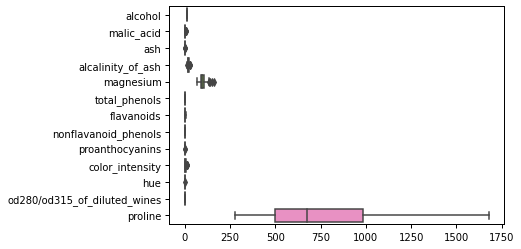

In [404]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE

sns.boxplot(data=data, orient="h")

<AxesSubplot:>

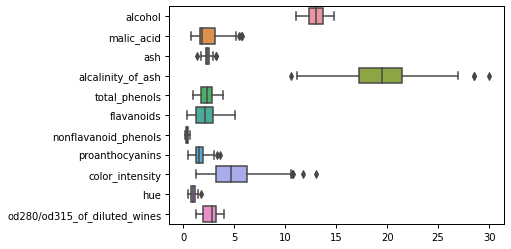

In [405]:
sns.boxplot(data=data.loc[:, ~data.columns.isin(["proline", "magnesium"])], orient="h")

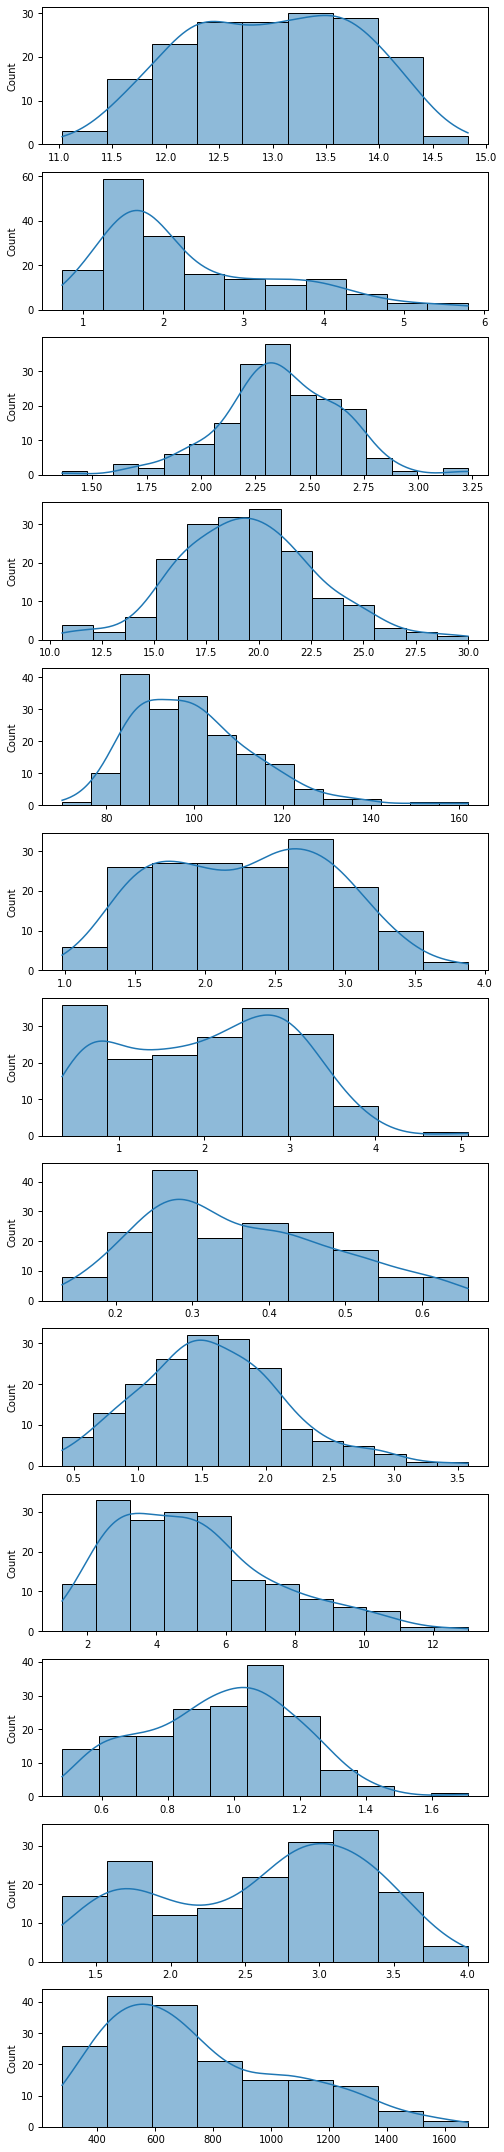

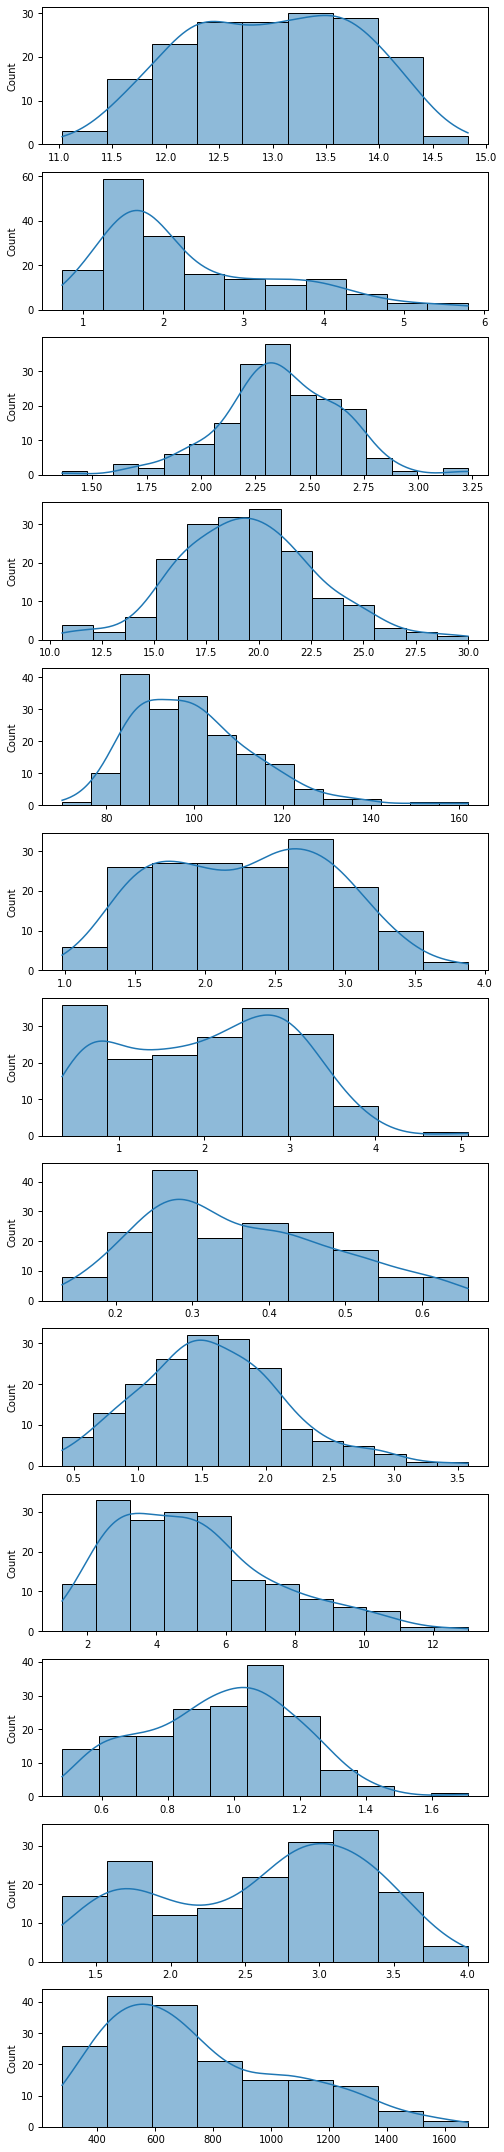

In [406]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE

colcount: int = len(data.columns)

fig, axes = plt.subplots(colcount, 1,figsize=(8, 3*colcount))

for c in range(colcount):
    col = data.columns[c]
    ax: plt.Axes = axes[c]
    sns.histplot(data=data[col].values, ax=ax, kde=True)


fig

Let's do some multivariate analysis

In [407]:
# Calculate the correlations between each pair of variables

data.corr()

# YOUR CODE HERE

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:title={'center':'Heatmap showing the correlations between pairs of features'}>

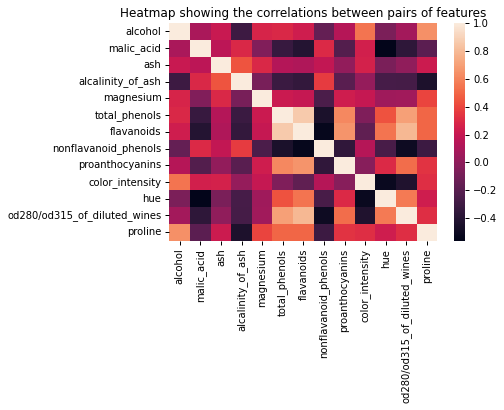

In [408]:
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

ax = sns.heatmap(data=data.corr())
ax.set_title("Heatmap showing the correlations between pairs of features")

ax




In [409]:
# What is the highest correlation between features?
max_corr = -1
max_corr_features = ("NONE","NONE")

correlated: pd.DataFrame = data.corr()
for colx, serx in correlated.iteritems():
    for coly, sery in serx.iteritems():
        if colx == coly:
            break
        if sery > max_corr:
            max_corr = sery
            max_corr_features = (colx, coly)

print(f"HIGHEST CORRELATION:\n"
      f"  {max_corr}\n"
      f"    {max_corr_features[0]}\n"
      f"    {max_corr_features[1]}")

HIGHEST CORRELATION:
  0.8645635000951156
    flavanoids
    total_phenols


You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [410]:


# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE

scaled_df: pd.DataFrame = pd.DataFrame(
    StandardScaler().fit_transform(data.to_numpy()),
    columns=data.columns
)

print(scaled_df.head())

initial_s_var = np.var(scaled_df.values)
print(f"Initial variance: {initial_s_var}")

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE

wine_pca_2comp = PCA(n_components=2)

pca2_vals = wine_pca_2comp.fit_transform(scaled_df)

pca2_var = np.var(pca2_vals)

def explained_and_retained(the_pca: PCA):
    print(f"explained: {the_pca.explained_variance_}\n"
          f"    {np.sum(the_pca.explained_variance_)}")
    print(f"var retained {the_pca.explained_variance_ratio_}\n"
          f"    {np.sum(the_pca.explained_variance_ratio_)}")


explained_and_retained(wine_pca_2comp)


    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [411]:
pca_df: pd.DataFrame = pd.DataFrame(data = wine_pca_2comp.components_, columns=x_cols)
pca_df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


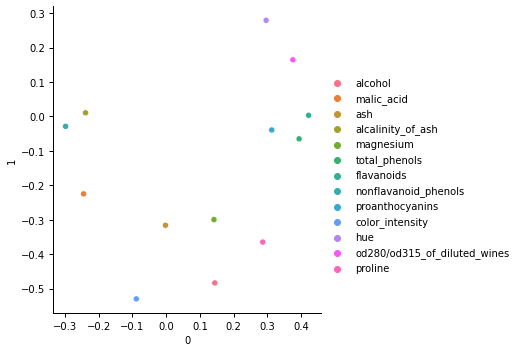

In [412]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE

sns.relplot(x=pca_df.iloc[0], y=pca_df.iloc[1], hue=x_cols, legend=True)

(178, 2)


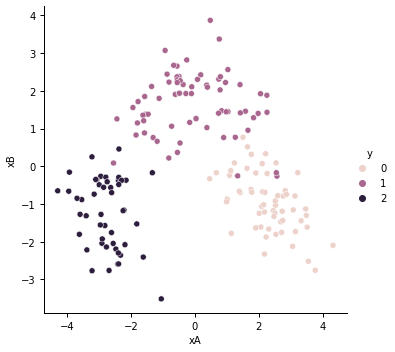

In [413]:
print(pca2_vals.shape)

pca_transformed_df: pd.DataFrame = pd.DataFrame(
    data = pca2_vals, columns=["xA", "xB"]
)


pca_transformed_df["y"] = df["y"]

sns.relplot(data=pca_transformed_df, x="xA", y="xB", hue="y", legend=True)

In [414]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE

wine_pca_85 = PCA(n_components=0.85)
wine_85var = wine_pca_85.fit_transform(scaled_df)

print(wine_pca_85.n_components_)

print(np.var(wine_85var))

explained_and_retained(wine_pca_85)

6
1.8437925149533585
explained: [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221]
    11.125256530905007
var retained [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]
    0.8509811607477044


In [415]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE

wine_pca_3 = PCA(n_components=3)
pca3_transformed = wine_pca_3.fit_transform(scaled_df)

explained_and_retained(wine_pca_3)

pca3_df: pd.DataFrame = pd.DataFrame(data = wine_pca_3.components_, columns=x_cols)
pca3_df.head()

explained: [4.73243698 2.51108093 1.45424187]
    8.697759775075172
var retained [0.36198848 0.1920749  0.11123631]
    0.6652996889318524


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746


In [416]:
pca3cols = ["xA","xB","xC"]
pca3_norm_df: pd.DataFrame = pd.DataFrame(
    data = pca3_transformed, columns=pca3cols
)

pca3_norm_df["y"] = df["y"]

pca3_norm_df.head()

,xA,xB,xC,y
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0


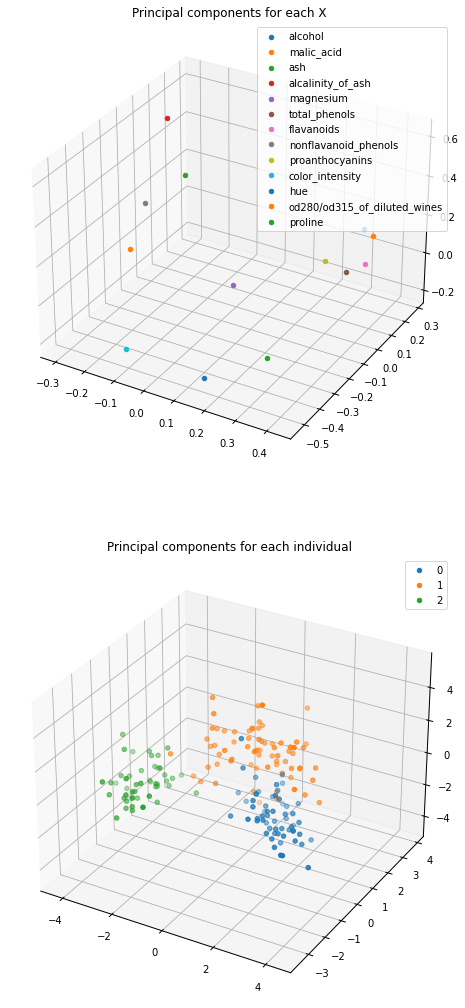

In [417]:
import mpl_toolkits.mplot3d

fig = plt.Figure(figsize=(16, 18))
components_ax = fig.add_subplot(2,1,1,projection='3d')

"""
ax3d.scatter(
    xs=pca3_df.iloc[0], ys=pca3_df.iloc[1],
    zs=pca3_df.iloc[2], depthshade=True
)
"""
#components_ax.set_title("Principal Components")
#for grp_name, grp_idx in df.groupby('grp').groups.items():
    
for i, col in enumerate(x_cols):
    components_ax.scatter(
        xs=pca3_df.iloc[0][col],
        ys=pca3_df.iloc[1][col],
        zs=pca3_df.iloc[2][col],
        label=col,
        depthshade=True
    )

components_ax.set_title("Principal components for each X")
components_ax.legend()

transformed_ax = fig.add_subplot(2,1,2,projection='3d')
for grp_name, grp_idx in df.groupby('y').groups.items():
    transformed_ax.scatter(
        xs = pca3_norm_df.iloc[grp_idx,0],
        ys = pca3_norm_df.iloc[grp_idx,1],
        zs = pca3_norm_df.iloc[grp_idx,2],
        label = grp_name
    )
transformed_ax.set_title("Principal components for each individual")
transformed_ax.legend()

fig

## Clustering

patchworklib

Let's see how many clusters does K-Means find.



{2: 886.1611364823486, 3: 513.0564645910765, 4: 431.4388294521701, 5: 372.11685014009646, 6: 326.3975183707463, 7: 288.51360720213825, 8: 268.97311831295053, 9: 237.25873775334566}


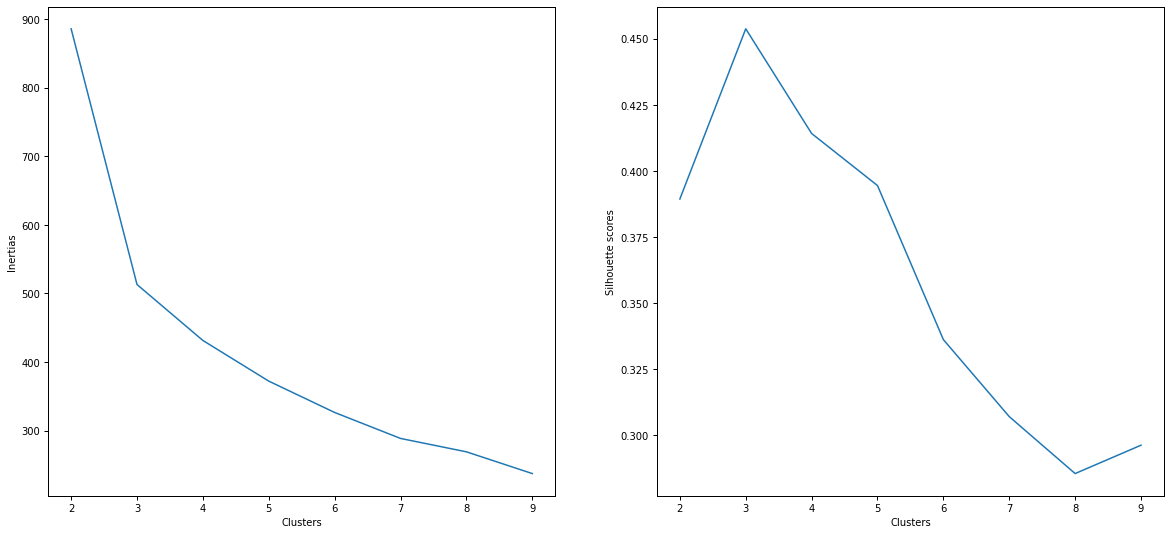

In [418]:


from scipy.spatial.distance import cdist

# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE

inertias = {}

predictions = {}
silhouettes = {}
models = {}


K = range(2, 10)

X = pca3_norm_df[pca3cols]
Y = pca3_norm_df["y"]

for k in K:
    
    kmeanModel = KMeans(n_clusters=k, init="random")
    predict = kmeanModel.fit_predict(X)
    
    predictions[k] = predict
    
    silhouettes[k] = silhouette_score(
        X, predict 
    )

    inertias[k] = kmeanModel.inertia_
    
    models[k] = kmeanModel

print(inertias)

fig, (ax0, ax1) = plt.subplots(1, 2, sharex="all", figsize=(20, 9))

ax0.plot(K, [*inertias.values()])
ax0.set_label("inertia/cluster count")
ax0.set_xlabel("Clusters")
ax0.set_ylabel("Inertias")

ax1.plot(K, [*silhouettes.values()])
ax1.set_ylabel("Silhouette scores")
ax1.set_xlabel("Clusters")
ax1.set_label("silhouette score/cluster count")


fig.show()



In [419]:
# Now use the silhouette score to choose between the
# two candidate k values from the previous cell

best_silhouette = max(silhouettes.items(), key=lambda kv:kv[1])

print(best_silhouette)

best_k = best_silhouette[0]
print(f"Best K value: {best_k}")

(3, 0.45379998482576156)
Best K value: 3


In [420]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


pca3_pred: pd.DataFrame = pca3_norm_df.copy()

pca3_pred["cluster"] = predictions[best_k]
pca3_pred["y"] = decode_wine_y(df["y"])

pca3_pred.head()

,xA,xB,xC,y,cluster
0,3.316751,-1.443463,-0.165739,class_0,2
1,2.209465,0.333393,-2.026457,class_0,2
2,2.516740,-1.031151,0.982819,class_0,2
3,3.757066,-2.756372,-0.176192,class_0,2
4,1.008908,-0.869831,2.026688,class_0,2


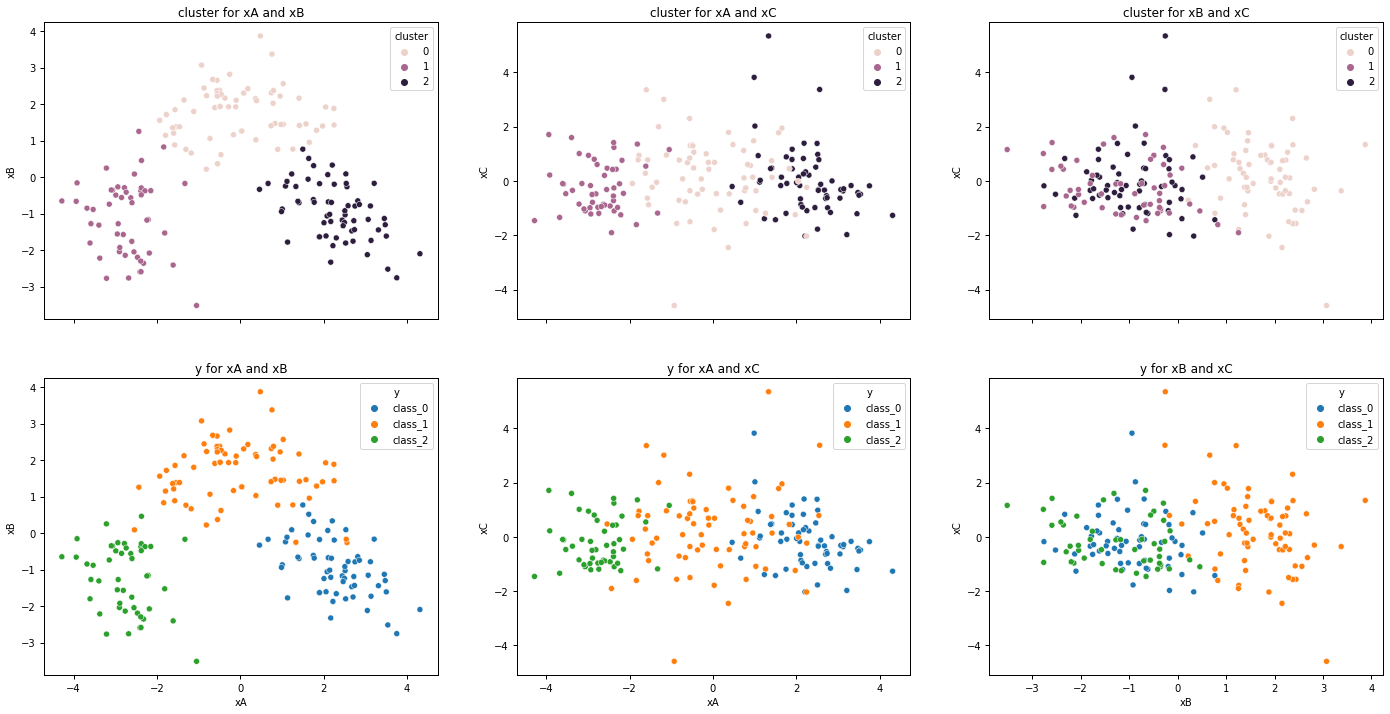

In [421]:
from typing import Tuple

fpr : Tuple[
    plt.Figure,
    Tuple[
        Tuple[plt.Axes, plt.Axes, plt.Axes],
        Tuple[plt.Axes, plt.Axes, plt.Axes]
    ]
] = plt.subplots(2, 3, figsize=(24, 12), sharex="col",sharey="col")

fig: plt.Figure = fpr[0]
preds: Tuple[plt.Axes, plt.Axes, plt.Axes] = fpr[1][0]
reals: Tuple[plt.Axes, plt.Axes, plt.Axes] = fpr[1][1]

pca_inds = [(0,1),(0,2),(1,2)]

def scatter_plotter(data: pd.DataFrame, label_inds, label_list, hue, ax):
    sns.scatterplot(
        data=data,
        x=data[label_list[label_inds[0]]],
        y=data[label_list[label_inds[1]]],
        hue=hue,
        ax=ax
    )
    ax.set_title(f"{hue} for {label_list[label_inds[0]]} and {label_list[label_inds[1]]}")

for i, pred_ax in enumerate(preds):
    scatter_plotter(pca3_pred, pca_inds[i], pca3cols, "cluster", pred_ax)

for i, real_ax in enumerate(reals):
    scatter_plotter(pca3_pred, pca_inds[i], pca3cols, "y", real_ax)

fig.show()

In [ ]:
from typing import Literal, Optional

def x_y_cat_plotter(
        df: pd.DataFrame,
        x_label,
        y_label,
        w,
        h,
        plot_type: Literal["violin","box","boxen"] = "violin"
) -> pw.Brick:

    if plot_type is None:
        plot_type = "violin"

    ax: pw.Brick = pw.Brick(label=f"{x_label}{y_label}{uuid.uuid4()}", figsize=(w,h))
    if plot_type == "violin":
        sns.violinplot(
            x=df[x_label],
            y=df[y_label],
            ax=ax, dodge=True, inner="box", orient="h"
        )
    elif plot_type == "box":
        sns.boxplot(
            x=df[x_label],
            y=df[y_label],
            ax=ax,
            dodge=True,
            orient="h"
        )
    elif plot_type == "boxen":
        sns.boxenplot(
            x=df[x_label],
            y=df[y_label],
            ax=ax,
            dodge=True,
            orient="h"
        )
    ax.set_title(f"{y_label} {plot_type} plot for {x_label}")

    return ax

def feature_cat_plotter(
        df: pd.DataFrame,
        x_labels,
        cluster_label = "cluster",
        w=12,
        h=3,
        plot_type: Literal["violin","box","boxen"] = "violin"
) -> pw.Bricks:

    the_bricks: pw.Bricks = x_y_cat_plotter(
        df, x_labels[0], cluster_label, w, h, plot_type
    ) / x_y_cat_plotter(
        df, x_labels[1], cluster_label, w, h, plot_type
    )

    for xl in x_labels[2:]:
        the_bricks = the_bricks / x_y_cat_plotter(
            df, xl, cluster_label, w, h, plot_type
        )

    the_bricks.case.set_title(f"Per-feature {plot_type} plots for {cluster_label}")

    return the_bricks

def real_clustered_cat_plots(
        df: pd.DataFrame,
        x_labels,
        real="y",
        cluster="cluster",
        w=24,
        h=3,
        plot_type: Literal["violin","box","boxen"] = "violin"
)-> pw.Bricks:

    clustered_real: pw.Bricks = feature_cat_plotter(
        df, x_labels, cluster, w/2, h, plot_type
    ) | feature_cat_plotter(
        df, x_labels, real, w/2, h, plot_type
    )

    clustered_real.case.set_title(f"Cluster/real per-feature {plot_type} plots")
    return clustered_real


real_clustered_cat_plots(pca3_pred, pca3cols).savefig()

Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE

scaled_pred: pd.DataFrame = scaled_df.copy()

scaled_pred["cluster"] = predictions[best_k]
scaled_pred["y"] = decode_wine_y(df["y"])

x_pred: pd.DataFrame = data.copy()
x_pred["cluster"] = predictions[best_k]
x_pred["y"] = decode_wine_y(df["y"])

In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE

def feature_box_plotter(df: pd.DataFrame, x_label, class_label="cluster", w=16, h=3) -> pw.Brick:

    ax: pw.Brick = pw.Brick(label=f"{x_label}_{uuid.uuid4()}", figsize=(w, h))
    sns.boxplot(
        x=df[x_label], y=df[class_label], ax=ax, dodge=True, orient="h"
    )
    ax.set_title(f"Box plots for {x_label}")
    return ax

def cluster_box_plotter(df: pd.DataFrame, x_labels, cluster_label = "cluster", w=16, h=3) -> pw.Bricks:

    the_bricks: pw.Bricks = feature_box_plotter(
        df, x_labels[0], cluster_label, w, h
    ) / feature_box_plotter(
        df, x_labels[1], cluster_label, w, h
    )

    for xl in x_labels[2:]:
        the_bricks = the_bricks / feature_box_plotter(
            df, xl, cluster_label, w, h
        )

    return the_bricks

In [ ]:
fig_scaled: plt.Figure = real_clustered_cat_plots(scaled_pred, x_cols, plot_type="boxen").savefig()
fig_scaled

In [ ]:
fig_unscaled: plt.Figure = real_clustered_cat_plots(x_pred, x_cols,plot_type="boxen").savefig()
fig_unscaled


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!